In [245]:
import tensorflow as tf### models
import pandas as pd ### reading and processing data
import seaborn as sns ### visualization
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [246]:
df = pd.read_csv(r'train.csv')

In [247]:
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [248]:
df.tail()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0
999,1000,590105,779743,5,67295,4,2,8,199,99,96,414938.5


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [250]:
df.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [251]:
df.shape

(1000, 12)

In [252]:
df.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [253]:
df.keys()

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [254]:
df.corr()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
v.id,1.000000,-0.029926,-0.030787,-0.034255,0.047400,-0.018263,-0.038548,0.047137,0.001613,-0.006997,-0.000632,-0.059460
on road old,-0.029926,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,-0.030787,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,-0.034255,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.047400,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.018263,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.038548,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,0.047137,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,0.001613,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.006997,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238


In [255]:
df.cov()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
v.id,8.341667e+04,-5.048332e+05,-5.070998e+05,-17.007508,3.990728e+05,-7.399399,-31.445445,30.366867,8.988488,-41.463463,-3.846346,-2.165096e+06
on road old,-5.048332e+05,3.411406e+09,1.136275e+08,723.631185,1.274980e+07,-4155.436004,-2587.026338,-3921.005756,-26830.347746,-59037.689846,11008.687710,1.715974e+09
on road now,-5.070998e+05,1.136275e+08,3.252301e+09,451.837120,-8.844456e+07,2262.387151,-812.382406,-2020.082207,13969.286766,-14882.559321,21563.603673,2.033231e+09
years,-1.700751e+01,7.236312e+02,4.518371e+02,2.955234,-1.046949e+02,0.065798,0.260148,0.192568,0.833861,-0.115421,1.044742,-2.569170e+03
km,3.990728e+05,1.274980e+07,-8.844456e+07,-104.694925,8.497495e+08,-1632.826667,-1123.013574,2124.906156,14872.065075,-31649.363143,8327.856967,-3.439609e+09
rating,-7.399399e+00,-4.155436e+03,2.262387e+03,0.065798,-1.632827e+03,1.967824,0.063167,-0.030531,-1.142426,-0.651099,0.130206,6.196546e+03
condition,-3.144545e+01,-2.587026e+03,-8.123824e+02,0.260148,-1.123014e+03,0.063167,7.977514,0.370370,1.006350,-4.146378,2.843427,3.920823e+04
economy,3.036687e+01,-3.921006e+03,-2.020082e+03,0.192568,2.124906e+03,-0.030531,0.370370,4.975350,-2.555681,-0.768018,1.955581,-9.761051e+03
top speed,8.988488e+00,-2.683035e+04,1.396929e+04,0.833861,1.487207e+04,-1.142426,1.006350,-2.555681,372.041593,22.884306,-8.000740,-6.807131e+04
hp,-4.146346e+01,-5.903769e+04,-1.488256e+04,-0.115421,-3.164936e+04,-0.651099,-4.146378,-0.768018,22.884306,420.944829,-5.969928,7.821565e+04


In [256]:
df.isnull().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [257]:
df.duplicated().sum()

0

<Figure size 1000x600 with 0 Axes>

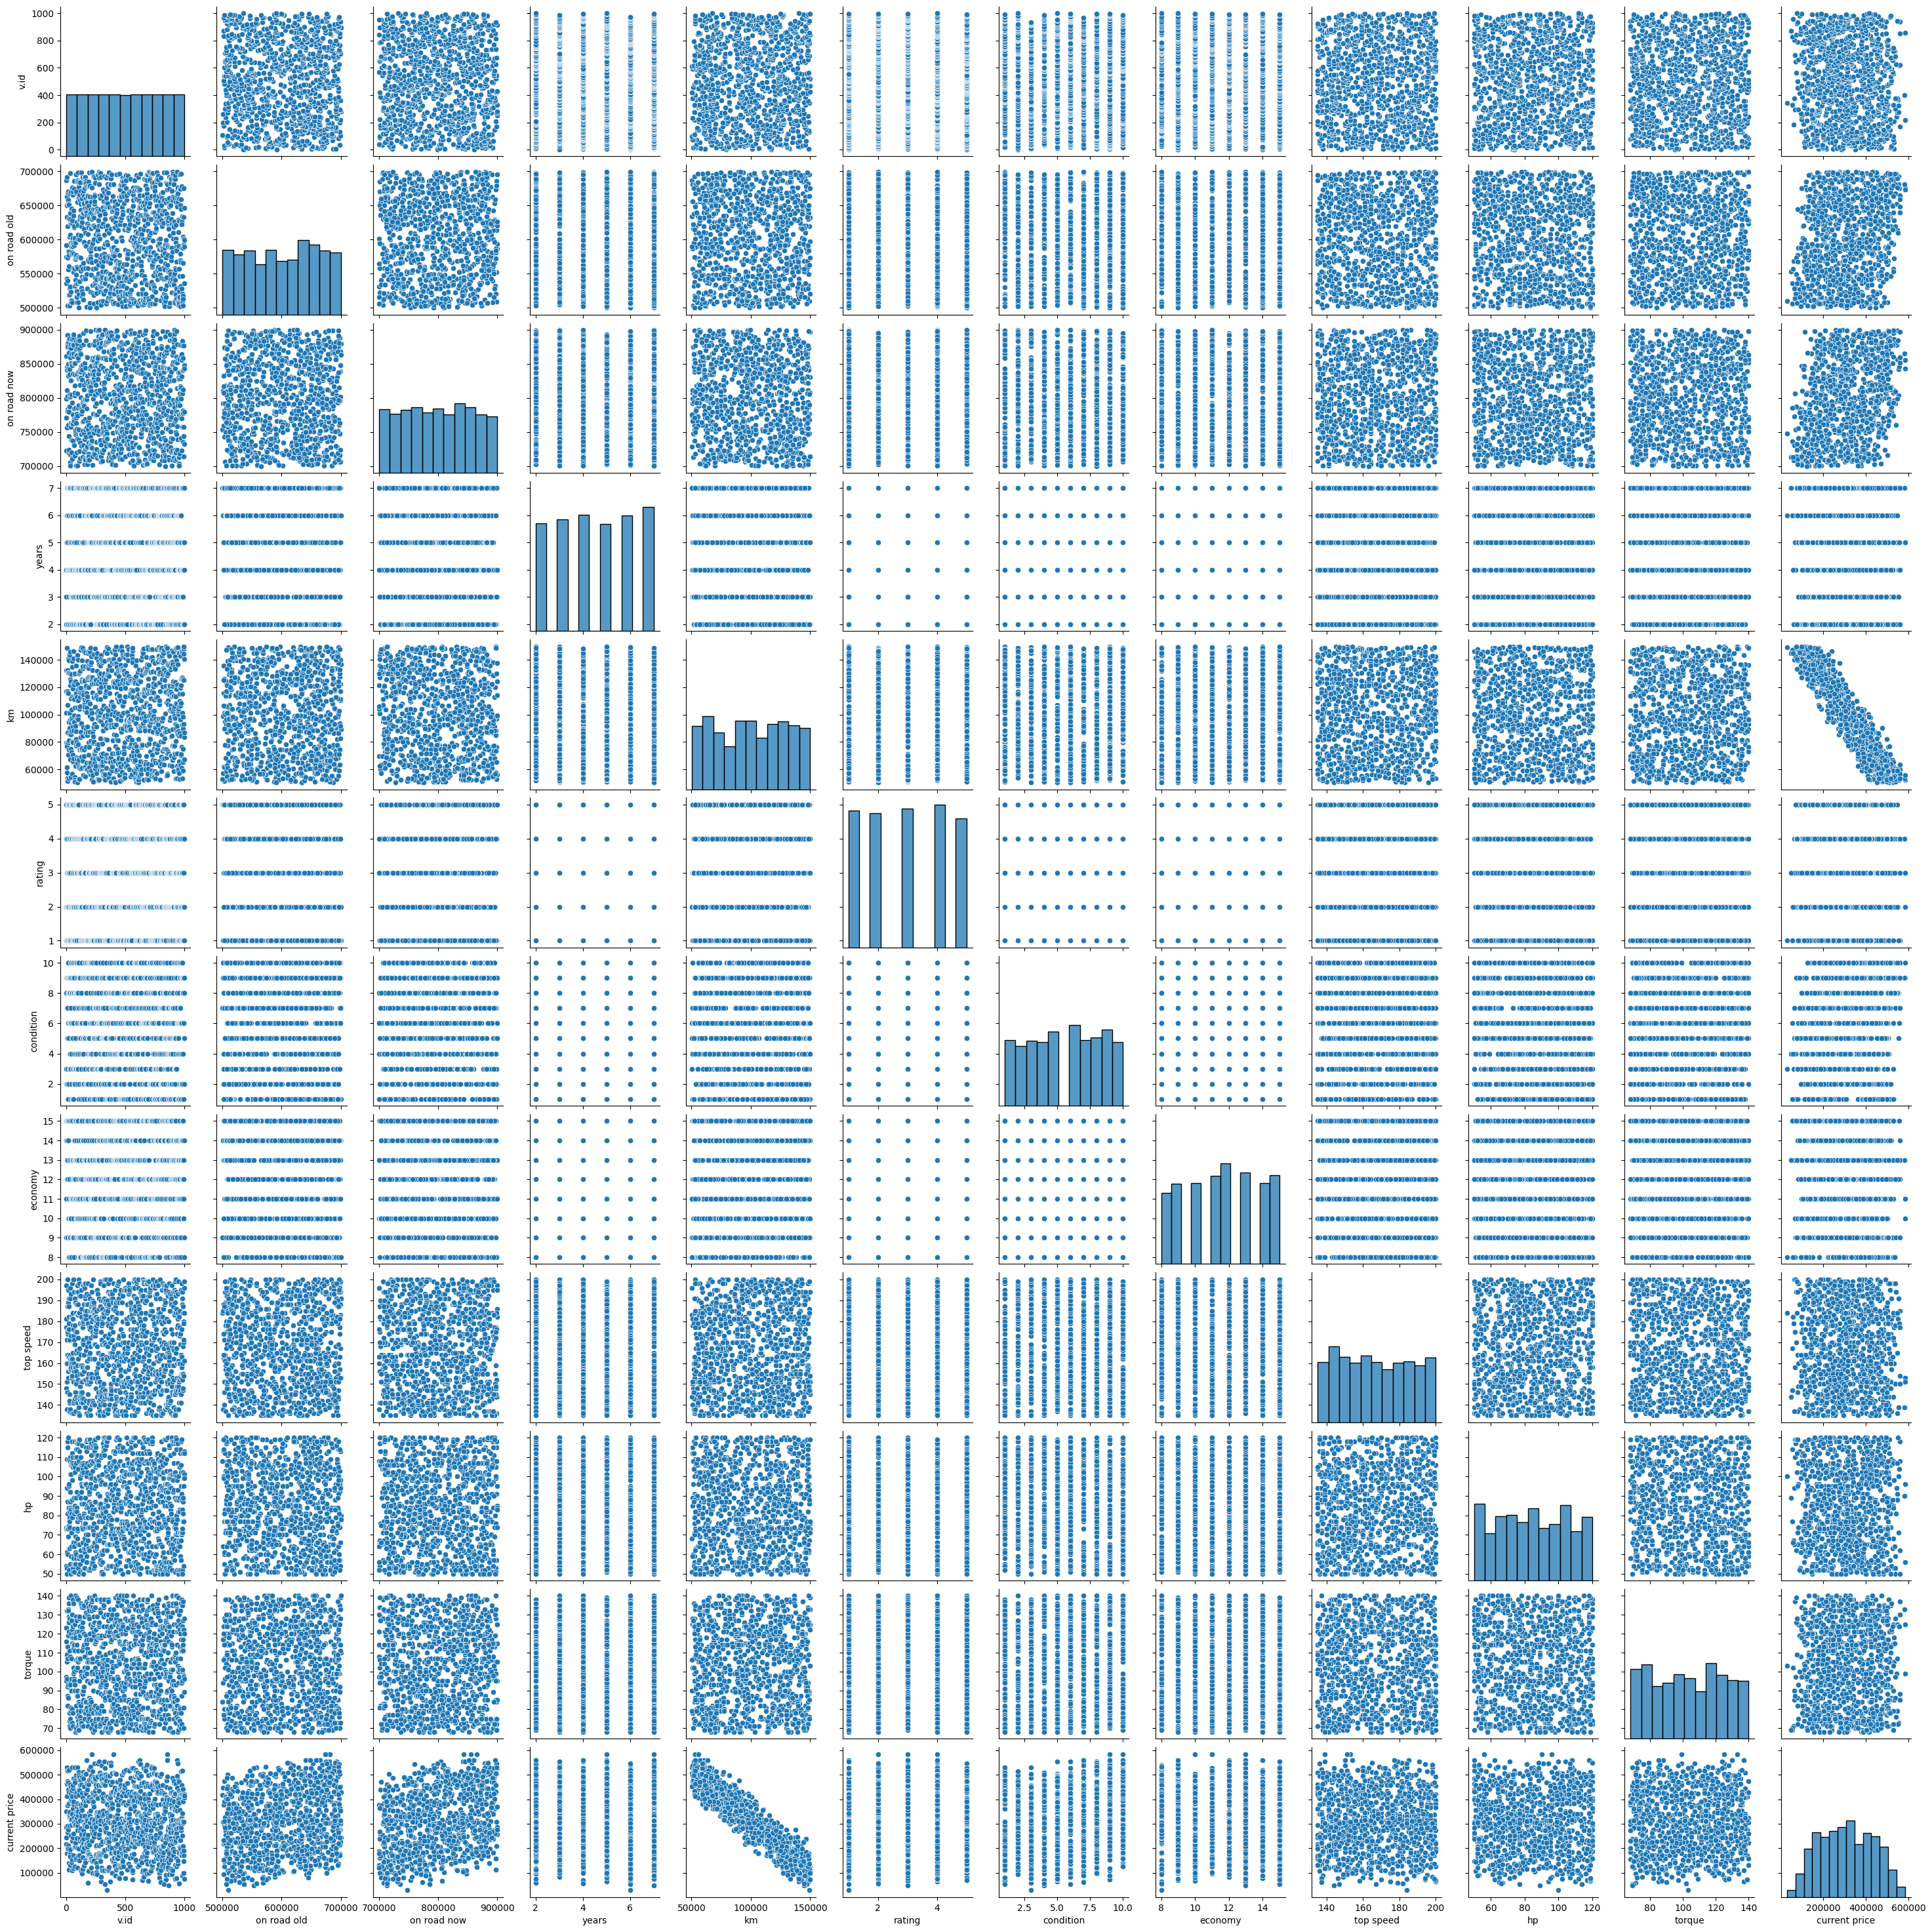

<Figure size 1000x600 with 0 Axes>

In [258]:
sns.pairplot(df[['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']])
plt.figure(figsize=(10, 6))

# Creating a random shuffle as the model usually understands in an order just to see if it gets tricked

In [259]:
shuffled_df = tf.random.shuffle(df)

In [260]:
shuffled_df[:5]

<tf.Tensor: shape=(5, 12), dtype=float64, numpy=
array([[2.830000e+02, 6.649830e+05, 7.368380e+05, 3.000000e+00,
        9.549500e+04, 2.000000e+00, 9.000000e+00, 1.000000e+01,
        1.370000e+02, 5.600000e+01, 7.800000e+01, 3.485350e+05],
       [5.890000e+02, 6.599000e+05, 7.316370e+05, 4.000000e+00,
        1.355290e+05, 2.000000e+00, 1.000000e+00, 1.100000e+01,
        1.540000e+02, 6.600000e+01, 8.800000e+01, 1.533715e+05],
       [5.400000e+01, 6.761700e+05, 7.103740e+05, 6.000000e+00,
        1.349330e+05, 2.000000e+00, 5.000000e+00, 1.100000e+01,
        1.810000e+02, 1.120000e+02, 7.300000e+01, 1.514740e+05],
       [5.650000e+02, 6.661760e+05, 8.670260e+05, 4.000000e+00,
        9.886700e+04, 2.000000e+00, 8.000000e+00, 1.500000e+01,
        1.960000e+02, 5.900000e+01, 1.210000e+02, 3.873215e+05],
       [8.270000e+02, 6.584410e+05, 8.638450e+05, 7.000000e+00,
        1.393230e+05, 3.000000e+00, 1.000000e+01, 1.200000e+01,
        1.700000e+02, 5.700000e+01, 1.110000e+02, 2

In [261]:
df[:5]

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [262]:
X = shuffled_df[:,3:-1] # removed the v.id column, on road old, on road now
y = shuffled_df[:,-1]

In [263]:
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [264]:
print(X)

tf.Tensor(
[[3.00000e+00 9.54950e+04 2.00000e+00 ... 1.37000e+02 5.60000e+01
  7.80000e+01]
 [4.00000e+00 1.35529e+05 2.00000e+00 ... 1.54000e+02 6.60000e+01
  8.80000e+01]
 [6.00000e+00 1.34933e+05 2.00000e+00 ... 1.81000e+02 1.12000e+02
  7.30000e+01]
 ...
 [7.00000e+00 7.92200e+04 1.00000e+00 ... 2.00000e+02 1.16000e+02
  9.00000e+01]
 [7.00000e+00 6.14780e+04 4.00000e+00 ... 1.61000e+02 5.50000e+01
  7.50000e+01]
 [3.00000e+00 1.16587e+05 3.00000e+00 ... 1.69000e+02 9.00000e+01
  1.24000e+02]], shape=(1000, 8), dtype=float64)


In [265]:
print(y)

tf.Tensor(
[348535.  153371.5 151474.  387321.5 245810.  466398.  447337.  196639.5
 418504.  515722.5 479896.  408452.5 385196.  166571.  527409.5 192853.5
 244229.  153381.5  93713.  425777.5 283208.  135309.  205716.5 244640.
 299019.5 248248.5 381960.  206296.5 329639.  324373.  490000.5 366732.
 446487.5 177509.5 293875.5 317168.5 520659.5 528418.5 170838.5 427496.
 111185.  503307.5 105427.5 500679.5 246460.  496293.5 460075.  169674.5
 224958.5 306745.5 248983.  352345.  456827.5 427132.5 144191.5 292308.5
 413066.  340720.  248119.5 187305.  172758.5 175102.5 249603.  216831.5
 299645.  221972.5 378132.5  78924.5 413954.5 354409.5 427590.  273761.
 307255.  385248.5 424305.  295002.  413288.  480307.  312164.5 440044.5
 233987.  295406.5 398023.  305002.5 334502.  501083.5 400444.5 158511.
 410516.  171620.  439166.  526394.  158741.5 267953.5 206883.5 341328.
 421655.5 403886.5 202702.  456840.5 409312.5 499121.  474281.5 316652.
 401011.5  97526.  421781.  408860.5 531114.5 2

In [266]:
print(X.shape)

(1000, 8)


In [267]:
print(y.shape)

(1000,)


In [268]:
print(X.shape, y.shape)
# to do this step watch the next step on how we take just take 1 dim instead of 8 so (1000,) ---> (1000, 1)

(1000, 8) (1000,)


In [269]:
y = tf.expand_dims(shuffled_df[:,-1], 1)

In [270]:
y

<tf.Tensor: shape=(1000, 1), dtype=float64, numpy=
array([[348535. ],
       [153371.5],
       [151474. ],
       [387321.5],
       [245810. ],
       [466398. ],
       [447337. ],
       [196639.5],
       [418504. ],
       [515722.5],
       [479896. ],
       [408452.5],
       [385196. ],
       [166571. ],
       [527409.5],
       [192853.5],
       [244229. ],
       [153381.5],
       [ 93713. ],
       [425777.5],
       [283208. ],
       [135309. ],
       [205716.5],
       [244640. ],
       [299019.5],
       [248248.5],
       [381960. ],
       [206296.5],
       [329639. ],
       [324373. ],
       [490000.5],
       [366732. ],
       [446487.5],
       [177509.5],
       [293875.5],
       [317168.5],
       [520659.5],
       [528418.5],
       [170838.5],
       [427496. ],
       [111185. ],
       [503307.5],
       [105427.5],
       [500679.5],
       [246460. ],
       [496293.5],
       [460075. ],
       [169674.5],
       [224958.5],
       [306745.5],

In [271]:
# for normilization that we have imported from tensorflow lets see 
a = tf.constant([1, 2, 3, 4, 5])
normalizer = Normalization()
print(normalizer(a))

tf.Tensor([1. 2. 3. 4. 5.], shape=(5,), dtype=float32)


In [272]:
# for normilization that we have imported from tensorflow lets see 
a = tf.constant([1, 2, 3, 4, 5])
normalizer = Normalization(mean =5, variance=4 )
print(normalizer(a))
#standarddevation = srt(variance)
#(X-mean)/standarddeviation(Variance)

tf.Tensor([-2.  -1.5 -1.  -0.5  0. ], shape=(5,), dtype=float32)


In [273]:
# mean for the above is 15/5 = 3

Value   Difference from Mean   Square of Difference

1       (1-3) = -2             4

2       (2-3) = -1             1

3       (3-3) = 0              0

4       (4-3) = 1              1

5       (5-3) = 2              4

Sum of squared differences = 4 + 1 + 0 + 1 + 4 = 10

Population Variance = 10 / 5 = 2

Sample Variance

Sample Variance = 10 / 4 = 2.5

Standard Deviation

The standard deviation is the square root of the variance:

Population Standard Deviation = √2 ≈ 1.414 Sample Standard Deviation = √2.5 ≈ 1.581

In [274]:
# (X-mean)/sqrt(var)
#(1-3)/2 = -1.0

# Lets try for 2d tensor


In [275]:
a = tf.constant([[3,4,5,6,7],[4,5,6,7,8]])
normalizer = Normalization(mean =5, variance=4 )
print(normalizer(a))

tf.Tensor(
[[-1.  -0.5  0.   0.5  1. ]
 [-0.5  0.   0.5  1.   1.5]], shape=(2, 5), dtype=float32)


In [276]:
# (X-mean)/sqrt(var)
#(8-5)/2 = 1.5. this is the out put of the above last element printed thats how we have go it

# we tell it to adapt the normalizer dependeing on its dataset so we use normilizer.adapt()

In [277]:
a = tf.constant([[3,4,5,6,7],[4,5,6,7,8]])
normalizer = Normalization()
normalizer.adapt(a)
print(normalizer(a))

tf.Tensor(
[[-1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.]], shape=(2, 5), dtype=float32)


# The reason why its -1 is because its axis normally like manually starts with -1 

In [278]:
a = tf.constant([[3,4,5,6,7],[4,5,6,7,8],[9,1,2,4,0]])
normalizer = Normalization(axis= 1)
normalizer.adapt(a)
print(normalizer(a))

tf.Tensor(
[[-0.88900095  0.39223233  0.3922322   0.2672614   0.56195146]
 [-0.50800055  0.98058075  0.9805806   1.0690452   0.8429272 ]
 [ 1.3970013  -1.3728129  -1.3728131  -1.3363061  -1.4048786 ]], shape=(3, 5), dtype=float32)


In [279]:
normalizer = Normalization(axis=-1)
normalizer.adapt(X)
X_normalized = normalizer(X)

In [280]:
print(X_normalized)

tf.Tensor(
[[-0.9084984  -0.16403905 -0.7046621  ... -1.5505698  -1.3920337
  -1.207848  ]
 [-0.32650065  1.2100055  -0.7046621  ... -0.6687691  -0.9043878
  -0.7327475 ]
 [ 0.8374948   1.1895497  -0.7046621  ...  0.7317379   1.3387837
  -1.4453981 ]
 ...
 [ 1.4194925  -0.72262865 -1.4178832  ...  1.7172799   1.5338422
  -0.63772744]
 [ 1.4194925  -1.3315685   0.7217802  ... -0.3056747  -1.4407984
  -1.350378  ]
 [-0.9084984   0.55987936  0.00855905 ...  0.10929035  0.2659626
   0.97761387]], shape=(1000, 8), dtype=float32)


# Model 

In [281]:
model = tf.keras.Sequential([
    normalizer,
    Dense(1),
    
    ], name = "first_sequential_model")
model.summary()


Model: "first_sequential_model"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_35 (Normaliza  (None, 8)                17        
 tion)                                                           
                                                                 
 dense_30 (Dense)            (None, 1)                 9         
                                                                 
Total params: 26
Trainable params: 9
Non-trainable params: 17
_________________________________________________________________


In [282]:
model = tf.keras.Sequential()
model.add(normalizer)
model.add(Dense(1))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_35 (Normaliza  (None, 8)                17        
 tion)                                                           
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 26
Trainable params: 9
Non-trainable params: 17
_________________________________________________________________


In [284]:
y_true = [[0.,1.],[0.,0.]]
y_pred = [[1.,1.],[1.,0.]]

# Using 'auto'/'sum_over_batch_size' reduction type.
mse = tf.keras.losses.MeanSquaredError()
print(mse(y_true, y_pred).numpy())
#(0-1)^2 + (1-1)^2 + (0-1)^2 + (0-0)^2 / 4 = 0.5


0.5


In [285]:
y_true = [[0.,1.],[0.,0.]]
y_pred = [[1.,1.],[1.,1.]]

# Using 'auto'/'sum_over_batch_size' reduction type.
mse = tf.keras.losses.MeanSquaredError()
print(mse(y_true, y_pred).numpy())
#(0-1)^2 + (1-1)^2 + (0-1)^2 + (0-1)^2 / 4 = 0.75

0.75


Mean squared error is good to find out the errors that are closer to the line of intercept but when the values are far we call them outlieres so mse can't find out the outliers properly so we use mean absolute error


If you need to identify with both mse and mean absoulte error we can use huber loss

If the Errors are too large then we use MAE, error is small we use mse

In [286]:
model.compile(optimizer =Adam(learning_rate=1e-3), loss = tf.keras.losses.Huber())

# Training and Optimization

In [287]:
X.shape

TensorShape([1000, 8])

In [288]:
y.shape

TensorShape([1000, 1])

In [289]:
history = model.fit(X, y, epochs = 100, verbose = 1)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 308514.4688
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 308430.1875
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 307886.5312
Epoch 4/100
32/32 [==============================] - 0s 986us/step - loss: 305782.6875
Epoch 5/100
32/32 [==============================] - 0s 978us/step - loss: 299996.6875
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 287137.6250
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 262670.8125
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 222305.0781
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 168509.4844
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 115468.2109
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 75682.7578
Epoch 12/100
32/32 [==============================] - 0s 1ms

In [290]:
history.history

{'loss': [308514.46875,
  308430.1875,
  307886.53125,
  305782.6875,
  299996.6875,
  287137.625,
  262670.8125,
  222305.078125,
  168509.484375,
  115468.2109375,
  75682.7578125,
  57698.46875,
  48902.703125,
  44191.34765625,
  41947.6640625,
  40662.140625,
  39879.7421875,
  39450.6953125,
  39069.82421875,
  38764.4140625,
  38678.66796875,
  38522.125,
  38237.484375,
  38283.38671875,
  37879.0546875,
  37801.90625,
  37562.6328125,
  37438.5,
  37399.36328125,
  37169.90234375,
  36998.24609375,
  36927.5625,
  36920.6796875,
  36716.5078125,
  36818.90234375,
  36653.25390625,
  36562.76171875,
  36435.00390625,
  36287.35546875,
  36316.4921875,
  36131.515625,
  36122.87890625,
  36068.61328125,
  36008.7109375,
  35937.13671875,
  35770.8046875,
  35779.4296875,
  35731.81640625,
  35755.3984375,
  35601.3515625,
  35560.8359375,
  35460.390625,
  35487.50390625,
  35587.2109375,
  35329.53515625,
  35386.30078125,
  35452.09375,
  35220.97265625,
  35182.5078125,
  351

In [291]:
history.history['loss']

[308514.46875,
 308430.1875,
 307886.53125,
 305782.6875,
 299996.6875,
 287137.625,
 262670.8125,
 222305.078125,
 168509.484375,
 115468.2109375,
 75682.7578125,
 57698.46875,
 48902.703125,
 44191.34765625,
 41947.6640625,
 40662.140625,
 39879.7421875,
 39450.6953125,
 39069.82421875,
 38764.4140625,
 38678.66796875,
 38522.125,
 38237.484375,
 38283.38671875,
 37879.0546875,
 37801.90625,
 37562.6328125,
 37438.5,
 37399.36328125,
 37169.90234375,
 36998.24609375,
 36927.5625,
 36920.6796875,
 36716.5078125,
 36818.90234375,
 36653.25390625,
 36562.76171875,
 36435.00390625,
 36287.35546875,
 36316.4921875,
 36131.515625,
 36122.87890625,
 36068.61328125,
 36008.7109375,
 35937.13671875,
 35770.8046875,
 35779.4296875,
 35731.81640625,
 35755.3984375,
 35601.3515625,
 35560.8359375,
 35460.390625,
 35487.50390625,
 35587.2109375,
 35329.53515625,
 35386.30078125,
 35452.09375,
 35220.97265625,
 35182.5078125,
 35151.07421875,
 35147.1796875,
 35176.72265625,
 35012.421875,
 35365.

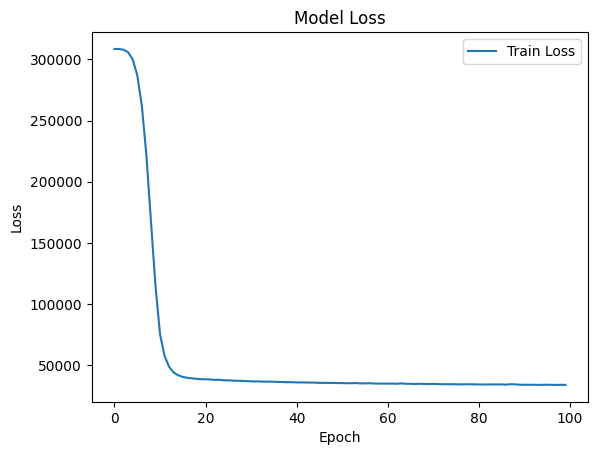

In [292]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss'], loc='upper right')
plt.show()

# Performance metrics

In [298]:
model.compile(optimizer =Adam(learning_rate=0.1), loss =MeanAbsoluteError(), metrics=[RootMeanSquaredError()])

In [300]:
history = model.fit(X, y, epochs = 100, verbose = 1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 34706.3789 - root_mean_squared_error: 43418.7109
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 32499.7676 - root_mean_squared_error: 41019.4805
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 30619.9082 - root_mean_squared_error: 38414.6250
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 31321.3359 - root_mean_squared_error: 40070.7109
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 31938.6680 - root_mean_squared_error: 40362.0430
Epoch 6/100
32/32 [==============================] - 0s 968us/step - loss: 33114.6875 - root_mean_squared_error: 41794.7305
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 32481.8066 - root_mean_squared_error: 41421.4648
Epoch 8/100
32/32 [==============================] - 0s 999us/step - loss: 32874.4023 - root_mean_squared_error: 41284.3594
Epoch 9/100
32/32 [=

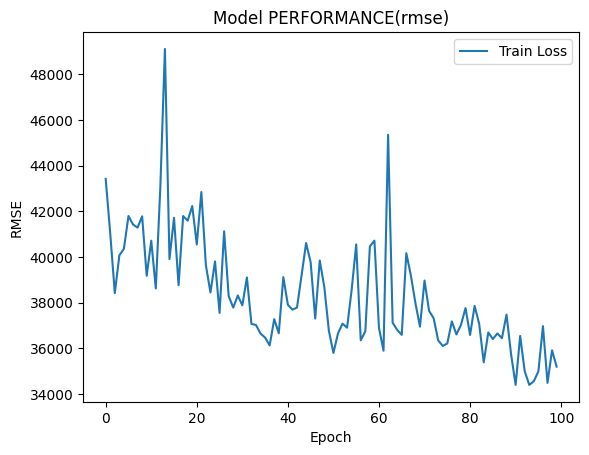

In [301]:
plt.plot(history.history['root_mean_squared_error'])
plt.title('Model PERFORMANCE(rmse)')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train Loss'], loc='upper right')
plt.show()

In [302]:
model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 31910.6777 - root_mean_squared_error: 40174.8164


[31910.677734375, 40174.81640625]

# VALIDATION AND TESTING

In [304]:
Training_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1
data_size = len(X)
print(data_size)

1000


In [306]:
# The dataset is dived like this
# 0.8 0.1 0.1
# 800 100 100

In [311]:
X_train = X[:int(data_size*Training_ratio)]
y_train = y[:int(data_size*Training_ratio)]
print(X_train.shape, y_train.shape)

(800, 8) (800, 1)


# for validation

In [313]:
X_val = X[int(data_size*Training_ratio): int(data_size*(Training_ratio+validation_ratio))]
y_val = y[int(data_size*Training_ratio): int(data_size*(Training_ratio+validation_ratio))]
print(X_val.shape, y_val.shape)

(100, 8) (100, 1)


# for testing

In [315]:
X_test = X[int(data_size*(Training_ratio+validation_ratio)):]
y_test = y[int(data_size*(Training_ratio+validation_ratio)):]
print(X_test.shape, y_test.shape)

(100, 8) (100, 1)


# Normalizer

In [316]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X_train)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.9207686 ,  0.69724786,  0.74856913,  0.40323234, -0.9208719 ,
        -1.3276862 ,  0.08677288, -0.05422759],
       [ 0.23743114,  1.2138892 ,  0.74856913,  0.7765955 ,  1.8556266 ,
        -0.6900828 ,  1.0458369 , -0.29631773],
       [-0.9207686 , -0.30447793, -1.3901999 ,  1.1499586 , -1.3836217 ,
        -0.88626844,  1.0001673 , -0.15106365],
       [ 0.23743114, -1.3141353 , -1.3901999 ,  1.5233217 ,  0.46737733,
         0.7813099 ,  1.5025342 ,  1.5435674 ],
       [-0.34166873,  1.313306  , -1.3901999 ,  1.1499586 ,  0.9301271 ,
         1.369867  , -0.09590599, -0.97417015]], dtype=float32)>

In [318]:
model = tf.keras.Sequential([
    normalizer,
    Dense(1),
    
    ], name = "first_sequential_model")
model.summary()

Model: "first_sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_36 (Normaliza  (None, 8)                17        
 tion)                                                           
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 26
Trainable params: 9
Non-trainable params: 17
_________________________________________________________________


In [321]:
model.compile(optimizer =Adam(learning_rate=0.1), loss =MeanAbsoluteError(), metrics=[RootMeanSquaredError()])

In [322]:
history = model.fit(
    X_train,y_train, 
    validation_data=(X_val, y_val),epochs = 100, verbose = 1)

Epoch 1/100
4/4 [==============================] - 0s 38ms/step - loss: 315834.8125 - root_mean_squared_error: 342869.5625 - val_loss: 315834.4375 - val_root_mean_squared_error: 342869.1875
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 315834.3750 - root_mean_squared_error: 342869.0938 - val_loss: 315834.0312 - val_root_mean_squared_error: 342868.7812
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 315833.9688 - root_mean_squared_error: 342868.6875 - val_loss: 315833.6250 - val_root_mean_squared_error: 342868.4062
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 315833.5312 - root_mean_squared_error: 342868.3125 - val_loss: 315833.2500 - val_root_mean_squared_error: 342868.0625
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 315833.1250 - root_mean_squared_error: 342867.9688 - val_loss: 315832.8438 - val_root_mean_squared_error: 342867.6875
Epoch 6/100
4/4 [==============================] -


# Another way to do the validation 

In [323]:
history = model.fit(X, y, validation_split=0.2, epochs = 100, verbose = 1)

Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 310693.8125 - root_mean_squared_error: 335205.1250 - val_loss: 299615.3438 - val_root_mean_squared_error: 325176.4375
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 310689.9688 - root_mean_squared_error: 335201.7188 - val_loss: 299612.4062 - val_root_mean_squared_error: 325173.8438
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 310685.9062 - root_mean_squared_error: 335198.1875 - val_loss: 299609.4062 - val_root_mean_squared_error: 325171.2812
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 310681.9688 - root_mean_squared_error: 335194.6875 - val_loss: 299606.4062 - val_root_mean_squared_error: 325168.6562
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 310678.0312 - root_mean_squared_error: 335191.1250 - val_loss: 299603.4688 - val_root_mean_squared_error: 325166.0938
Epoch 6/100
25/25 [==========================

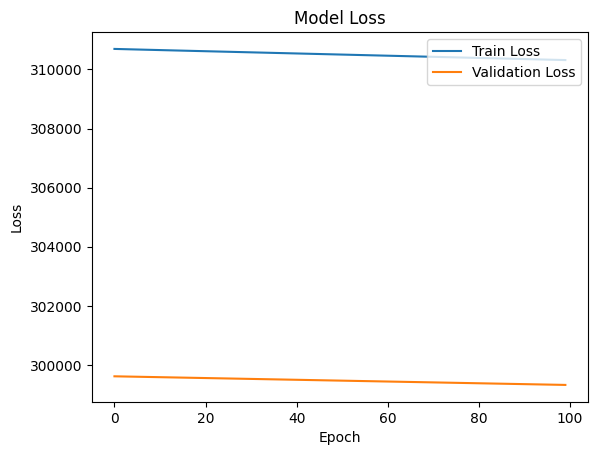

In [324]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot for root mean squared error

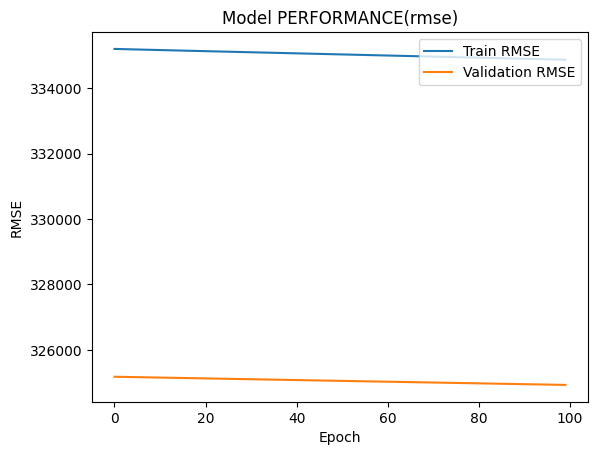

In [325]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model PERFORMANCE(rmse)')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train RMSE', 'Validation RMSE'], loc='upper right')
plt.show()

In [326]:
model.evaluate(X_val, y_val)

4/4 [==============================] - 0s 2ms/step - loss: 315544.8125 - root_mean_squared_error: 342618.5000


[315544.8125, 342618.5]

In [327]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 283102.8438 - root_mean_squared_error: 306213.0312


[283102.84375, 306213.03125]

# TO make Predictions

In [328]:
X_test[0]

<tf.Tensor: shape=(8,), dtype=float64, numpy=
array([4.00000e+00, 1.03761e+05, 4.00000e+00, 1.00000e+01, 1.10000e+01,
       1.62000e+02, 1.07000e+02, 9.60000e+01])>

In [329]:
model.predict(X_test[0])

1/1 [==============================] - 0s 90ms/step


array([[178.20833]], dtype=float32)

In [331]:
print(y_test[0])

tf.Tensor([389925.5], shape=(1,), dtype=float64)


In [340]:
y_pred = model(X_test)[:,0].numpy()
print(y_pred.shape)

(100,)


In [346]:
y_pred = model(X_test)[:,0].numpy()
print(y_pred)

[ 178.20831   421.41345   268.9395    396.18323   944.6549    234.88277
  503.05725  -177.80011   249.26546    46.82733    60.012955   88.89896
  754.261     563.728     754.9028    785.6487    632.57324   169.33969
  417.66788   563.3165    260.51288   630.70935   232.96042   103.502426
  491.27527   639.97675    93.418884  572.81      343.2929    750.3454
  779.7912   1063.6339    -98.81528    57.706345  691.5974     40.59349
  567.2401    287.7249   -327.9436     78.40878   481.7088    613.9011
  529.85156   781.3851    529.26624   156.57773    68.36049   282.67953
  -47.034424  409.38858   495.75348   603.8452    398.44455   206.62207
  930.4829    582.8375    682.25824   481.06897    58.91855   349.84164
  535.41724   505.9602    172.39899   420.8302    -47.85672   462.50085
  141.05037   657.81824   360.6881    383.28745    48.814377  225.20569
  252.11105   228.68393   614.7068    212.34377   881.8644    280.25177
  210.25848   910.6941    820.5043     77.099686   94.35066   795

In [342]:
y_true = y_test[:,0].numpy()
print(y_true) # actual prices of the cars

[389925.5 377706.5 199313.5 104215.  122225.5 141833.5 405950.  199798.
 148734.5 152125.5 457880.5 332812.  425083.5  94467.5 153991.  315914.5
 217446.  421679.5 510361.5 177933.5 184092.5 211528.5 331263.5 349762.
 122843.5 481862.  308376.5 296829.  291815.5 159614.5 319728.  238941.
 239400.  135874.  385031.  423507.  174352.5 206678.  392920.5 276805.5
  71314.  182219.5 378071.5 388209.5 312469.  402812.5 201073.  120583.5
 459833.5 457581.  304923.5 322684.  369571.5 181428.5 246242.  307096.
 443423.  225669.5 418934.  291776.5 253530.5 486699.  218814.  170104.5
 417693.5 333278.  260801.  339888.  382461.5 311109.  187009.  242950.
 528770.  315131.5 218665.5 500164.  183465.5 310987.  108741.  169784.
 201188.5  69231.5 144124.  150074.  328863.  315925.  250955.  313879.
 501920.5 125721.5 360410.  200794.5 306660.  420401.  240926.  415103.
 116254.5 420075.5 390305.5 168854.5]


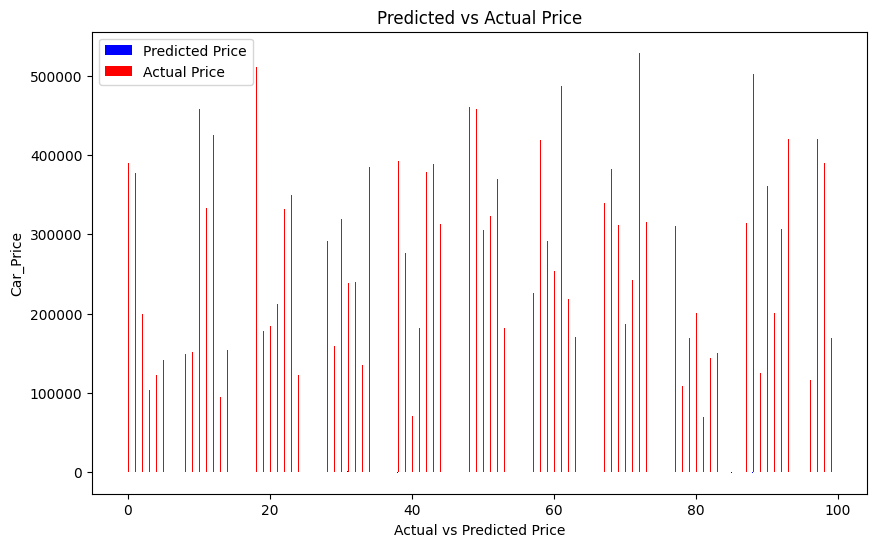

In [345]:
plt.figure(figsize=(10, 6))
width = 0.1

# Convert TensorFlow tensors to NumPy arrays and ensure they are 1D
y_pred_np = y_pred  # Already a 1D NumPy array from .numpy() call
y_test_np = y_test.numpy().flatten()  # Convert to NumPy and flatten to 1D

# Create the bar chart with NumPy arrays
plt.bar(tf.range(100).numpy(), y_pred_np, width, label='Predicted Price', color='b')
plt.bar(tf.range(100).numpy()+width, y_test_np, width, label='Actual Price', color='r')

plt.xlabel('Actual vs Predicted Price')
plt.ylabel('Car_Price')
plt.title('Predicted vs Actual Price')
plt.legend()
plt.show()

# Corrective Measures